In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image 
import keras
from keras.preprocessing.image import ImageDataGenerator 
from keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
from keras.models import Model
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, classification_report
import scikitplot as skplt
import seaborn as sns
import random 
import glob

## Input Layer
Source: Intel Image 
https://www.kaggle.com/datasets/puneet6060/intel-image-classification

In [2]:
image_generator = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        brightness_range=[0.2,1.2], 
                                        validation_split=0.25)

pathway_train = 'desktop/Intel_images/seg_train/seg_train'

train = image_generator.flow_from_directory(batch_size=80,
                                                 directory=pathway_train,
                                                 shuffle=True,
                                                 target_size=(150,150), 
                                                 subset="training",
                                                 class_mode='categorical')

val = image_generator.flow_from_directory(batch_size=80,
                                                 directory=pathway_train,
                                                 shuffle=True,
                                                 target_size=(150,150), 
                                                 subset="validation",
                                                 class_mode='categorical')

pathway_test = 'desktop/Intel_images/seg_test/seg_test'

test_image_gen = ImageDataGenerator(rescale=1./255)
test = test_image_gen.flow_from_directory(pathway_train,
                                       target_size=(150,150), batch_size=80, shuffle=False)

Found 10528 images belonging to 6 classes.
Found 3506 images belonging to 6 classes.
Found 14034 images belonging to 6 classes.


In [3]:
def plot_loss_accuracy(history):
    plt.figure(figsize = (15,5))
    plt.subplot(121)
    plt.title('LOSS OF MODEL')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')

    plt.subplot(122)
    plt.title('ACCURACY OF MODEL')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend(['training', 'validation'])
    plt.show()

## Baselina: VGG16

In [4]:
from tensorflow.keras.applications import VGG16

VGG16_model = VGG16(include_top=False, input_shape=(150, 150, 3), weights ='imagenet')
VGG16_model.trainable = True

CNN = layers.Flatten()(VGG16_model.layers[-1].output)
CNN = layers.Dropout(0.4)(CNN) 

CNN = layers.Dense(128, activation='relu')(CNN)
output = layers.Dense(6, activation='softmax')(CNN)
VGG16_model = Model(inputs=VGG16_model.inputs, outputs=output)

VGG16_model.summary()

Metal device set to: Apple M1


2022-10-28 14:31:43.548607: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-28 14:31:43.548715: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

###### VGG16 Model Data Fit
Learning Rage = 0.001     
Epochs = 5

Epoch 1/5


2022-10-28 14:31:44.172508: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-28 14:31:44.624751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


132/132 [==============================] - ETA: 0s - loss: 1.6929 - accuracy: 0.2813

2022-10-28 14:37:05.782368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


132/132 [==============================] - 357s 3s/step - loss: 1.6929 - accuracy: 0.2813 - val_loss: 1.2336 - val_accuracy: 0.4655
Epoch 2/5
132/132 [==============================] - 396s 3s/step - loss: 1.2010 - accuracy: 0.4929 - val_loss: 1.2545 - val_accuracy: 0.5262
Epoch 3/5
132/132 [==============================] - 414s 3s/step - loss: 1.0200 - accuracy: 0.5890 - val_loss: 0.9250 - val_accuracy: 0.6326
Epoch 4/5
132/132 [==============================] - 403s 3s/step - loss: 0.8906 - accuracy: 0.6600 - val_loss: 0.8350 - val_accuracy: 0.7022
Epoch 5/5
132/132 [==============================] - 396s 3s/step - loss: 0.7921 - accuracy: 0.7029 - val_loss: 0.8735 - val_accuracy: 0.6372


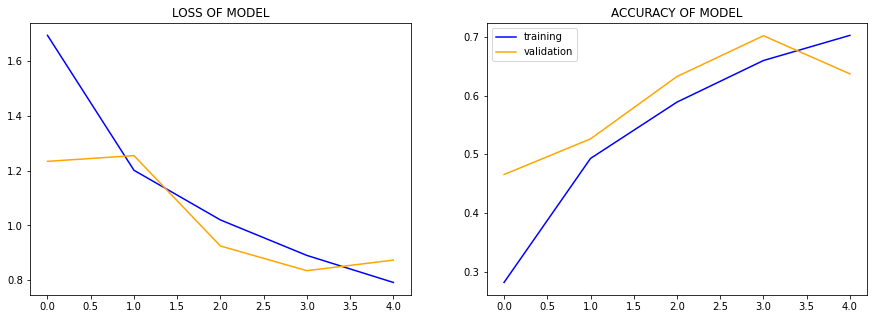

In [5]:
callbacks = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)

VGG16_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),  # learning rate = 0.1
    loss=tf.keras.losses.CategoricalCrossentropy(
    from_logits=False, name='categorical_crossentropy'),
    metrics=[tf.keras.metrics.CategoricalAccuracy(
    name='accuracy')])

history_VGG = VGG16_model.fit(train, epochs=5, validation_data=val, callbacks =[callbacks])
plot_loss_accuracy(history_VGG)

### VGG16 Optimization
Learning Rage = 0.00001    
Epochs = 10

Epoch 1/8


2022-10-28 16:18:56.223081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


132/132 [==============================] - ETA: 0s - loss: 1.1211 - accuracy: 0.5330

2022-10-28 16:24:37.656815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


132/132 [==============================] - 379s 3s/step - loss: 1.1211 - accuracy: 0.5330 - val_loss: 0.6532 - val_accuracy: 0.7439
Epoch 2/8
132/132 [==============================] - 421s 3s/step - loss: 0.5692 - accuracy: 0.7842 - val_loss: 0.4799 - val_accuracy: 0.8240
Epoch 3/8
132/132 [==============================] - 444s 3s/step - loss: 0.4722 - accuracy: 0.8279 - val_loss: 0.3930 - val_accuracy: 0.8562
Epoch 4/8
132/132 [==============================] - 436s 3s/step - loss: 0.4031 - accuracy: 0.8535 - val_loss: 0.3544 - val_accuracy: 0.8691
Epoch 5/8
132/132 [==============================] - 436s 3s/step - loss: 0.3681 - accuracy: 0.8672 - val_loss: 0.3269 - val_accuracy: 0.8908
Epoch 6/8
132/132 [==============================] - 436s 3s/step - loss: 0.3344 - accuracy: 0.8809 - val_loss: 0.3375 - val_accuracy: 0.8871
Epoch 7/8
132/132 [==============================] - 442s 3s/step - loss: 0.3112 - accuracy: 0.8892 - val_loss: 0.3042 - val_accuracy: 0.8925
Epoch 8/8
132/13

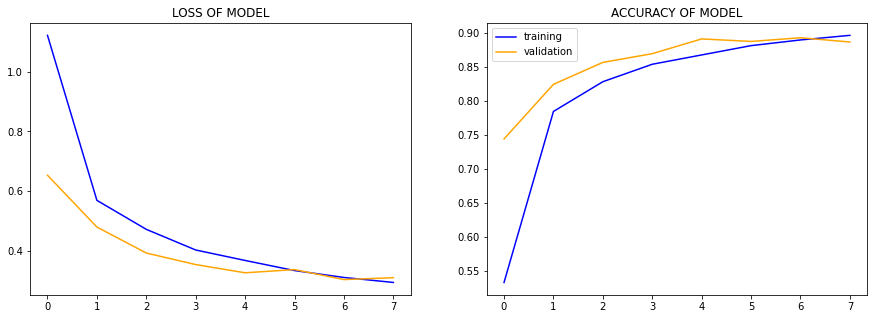

In [7]:
VGG16_opt_model = VGG16(include_top=False, input_shape=(150, 150, 3), weights ='imagenet')
VGG16_opt_model.trainable = True

CNN = layers.Flatten()(VGG16_opt_model.layers[-1].output)
CNN = layers.Dropout(0.4)(CNN) 

CNN = layers.Dense(128, activation='relu')(CNN)
output = layers.Dense(6, activation='softmax')(CNN)
VGG16_opt_model = Model(inputs=VGG16_opt_model.inputs, outputs=output)

VGG16_opt_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # learning rate = 0.00001
    loss=tf.keras.losses.CategoricalCrossentropy(
    from_logits=False, name='categorical_crossentropy'),
    metrics=[tf.keras.metrics.CategoricalAccuracy(
    name='accuracy')])

history_VGG16_Opt = VGG16_opt_model.fit(train, epochs=8, validation_data=val, callbacks =[callbacks])
plot_loss_accuracy(history_VGG16_Opt)

## EfficientNet Model

###### EfficientNet Model Data Fit
Learning Rage = 0.00001     
Epochs = 8

In [8]:
from tensorflow.keras.applications import EfficientNetB2

EfficientNet_model = EfficientNetB2(include_top=False, input_shape=(150, 150, 3), weights ='imagenet')
EfficientNet_model.trainable = True

CNN2 = layers.Flatten()(EfficientNet_model.layers[-1].output)
CNN2 = layers.Dropout(0.4)(CNN2) # 0.1, 0.2, 0.3, 0.4 

CNN2 = layers.Dense(128, activation='relu')(CNN2) #128, 64, 512
output2 = layers.Dense(6, activation='softmax')(CNN2)
EfficientNet_model = Model(inputs=EfficientNet_model.inputs, outputs=output2)

EfficientNet_model.summary()

31790344/31790344 [==============================] - 3s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 150, 150, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambd

Epoch 1/8


2022-10-28 17:21:04.487705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


132/132 [==============================] - ETA: 0s - loss: 1.5041 - accuracy: 0.4299

2022-10-28 17:25:39.387496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


132/132 [==============================] - 305s 2s/step - loss: 1.5041 - accuracy: 0.4299 - val_loss: 2.2800 - val_accuracy: 0.1748
Epoch 2/8
132/132 [==============================] - 316s 2s/step - loss: 1.0002 - accuracy: 0.6210 - val_loss: 2.3851 - val_accuracy: 0.2285
Epoch 3/8
132/132 [==============================] - 324s 2s/step - loss: 0.8117 - accuracy: 0.6942 - val_loss: 2.3836 - val_accuracy: 0.2955
Epoch 4/8
132/132 [==============================] - 328s 2s/step - loss: 0.7218 - accuracy: 0.7372 - val_loss: 2.0501 - val_accuracy: 0.3890
Epoch 5/8
132/132 [==============================] - 326s 2s/step - loss: 0.6749 - accuracy: 0.7514 - val_loss: 1.3895 - val_accuracy: 0.5402
Epoch 6/8
132/132 [==============================] - 312s 2s/step - loss: 0.6214 - accuracy: 0.7696 - val_loss: 1.0912 - val_accuracy: 0.6335
Epoch 7/8
132/132 [==============================] - 315s 2s/step - loss: 0.5880 - accuracy: 0.7855 - val_loss: 0.7071 - val_accuracy: 0.7410
Epoch 8/8
132/13

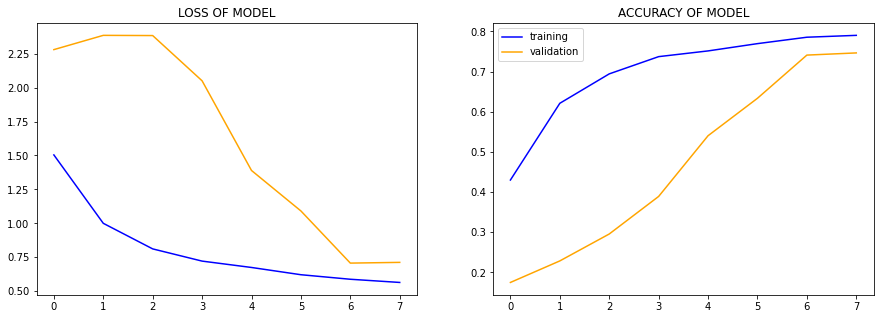

In [9]:
EfficientNet_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # learning rate
    loss=tf.keras.losses.CategoricalCrossentropy(
    from_logits=False, name='categorical_crossentropy'),
    metrics=[tf.keras.metrics.CategoricalAccuracy(
    name='accuracy')])

history_EfficientNet = EfficientNet_model.fit(train, epochs=8, validation_data=val, callbacks =[callbacks])
plot_loss_accuracy(history_EfficientNet)

## Performance
Accuracy, AUC, ROC and Cnfusion matrix

In [11]:
def performance(test_pred, test_data, val_pred, val_data):
    
    #AUC
    class_report = classification_report(val_data.classes, val_pred.argmax(axis=1))
    print("classification_report of validation dataset :\n")
    print(class_report)
    print("#"*60)
    class_report = classification_report(test_data.classes, test_pred.argmax(axis=1))
    print("classification_report of test dataset:\n")
    print(class_report)
    print("#"*60)
    acc = accuracy_score(val_pred.argmax(axis=1), val_data.classes)
    print('validation_accuracy: %.3f' % (acc))

    #ROC 
    auc_score = roc_auc_score(val_data.classes, val_pred,  multi_class = 'ovo') 
    print('auc score of validation dataset =',auc_score) 
    print("#"*60)
    print("#"*60)
    acc = accuracy_score(test_pred.argmax(axis=1), test_data.classes)
    print(acc)
    print('test_accuracy: %.3f' % (acc))
    auc_score = roc_auc_score(test_data.classes, test_pred,  multi_class = 'ovo') 
    print('auc score of test dataset =',auc_score) 
    print("#"*60)
    
    # Confusion Matrix
    plt.figure(figsize = (10,7))
    cm_val = confusion_matrix(val_pred.argmax(axis=1), val_data.classes)
    plt.title("Confusion_matrix of validation dataset")
    sns.heatmap(cm_val, annot = True, fmt='d')
    plt.show()
    print("#"*60)
    plt.figure(figsize = (10,7))
    plt.title ("Confusion_matrix of test dataset")
    cm_test = confusion_matrix(test_pred.argmax(axis=1), test_data.classes)
    sns.heatmap(cm_test, annot = True, fmt='d')
    plt.show()
    print("#"*60)
    skplt.metrics.plot_roc(val_data.classes, val_pred, figsize = (8,7))
    plt.title ("ROC curve on validation dataset")
    plt.show()
    skplt.metrics.plot_roc(test_data.classes, test_pred, figsize = (8,7))
    plt.title ("ROC curve on test dataset")
    plt.show()

    return 

val = image_generator.flow_from_directory(batch_size=80,
                                             directory=pathway_train,
                                             shuffle=False,
                                             target_size=(150,150), 
                                             subset="validation",
                                             class_mode='categorical')

Found 3506 images belonging to 6 classes.


## Best Model Performance

44/44 [==============================] - 31s 718ms/step
classification_report of validation dataset :

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       547
           1       0.98      0.97      0.97       567
           2       0.87      0.82      0.84       601
           3       0.81      0.91      0.86       628
           4       0.94      0.89      0.92       568
           5       0.95      0.83      0.88       595

    accuracy                           0.89      3506
   macro avg       0.90      0.89      0.89      3506
weighted avg       0.90      0.89      0.89      3506

############################################################
classification_report of test dataset:

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2191
           1       0.99      0.98      0.99      2271
           2       0.86      0.89      0.88      2404
           3       0.88      0.90   

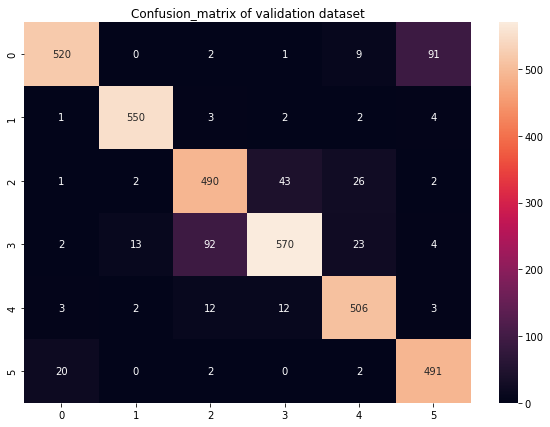

############################################################


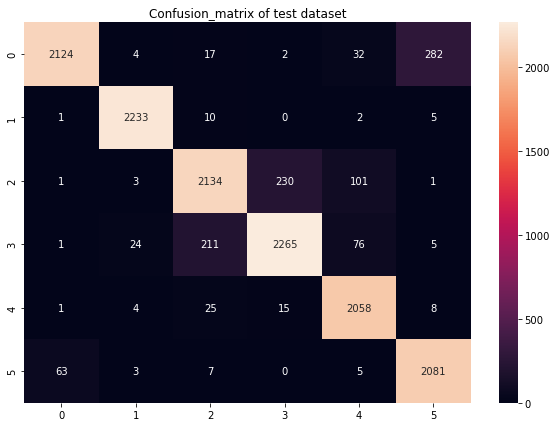

############################################################


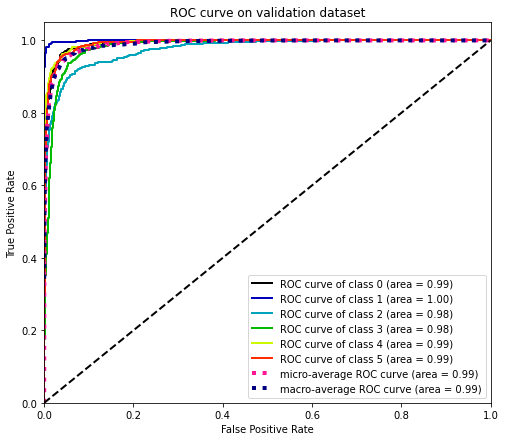

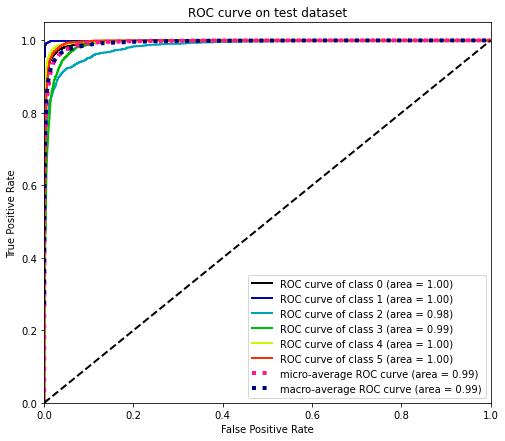

In [12]:
test_VGG = VGG16_opt_model.predict(test)
val_VGG = VGG16_opt_model.predict(val)

performance(test_VGG, test, val_VGG, val)

## Best Model Application

1/1 [==============================] - 0s 26ms/step


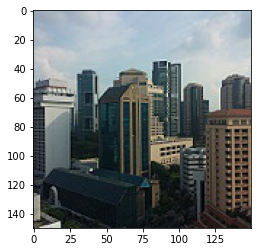

It is a buildings


In [20]:
from keras.preprocessing import image

pathway = random.choice(glob.glob("desktop/Intel_images/seg_pred/seg_pred/*"))
labels = list(train.class_indices.keys())
sample = tf.keras.utils.load_img(pathway, target_size=(150, 150))
x = tf.keras.utils.img_to_array(sample)
x = np.expand_dims(x, axis=0)

VGG_pred = VGG16_opt_model.predict(x)
n = np.argmax(VGG_pred) 
plt.imshow(sample)
plt.show()
print(f"It is a {labels[n]}" )